In [104]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [105]:
dc = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/dc-wikia-data.csv")
mv = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv")

#column continuity
mv.rename(columns={'Year':'YEAR'}, inplace=True)

#DC/MV dummies
mv['dc_mv'] = 1
dc['dc_mv'] = 0

#concat df
df = pd.concat([mv, dc], axis = 0)

#rename columns
df.columns = ['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'GSM', 'ALIVE', 'APPEARANCES', '1st_APPEARANCE', 'YEAR', 'dc_mv']

df['GSM'] = df['GSM'].fillna('Sraight')
df['HAIR'] = df['HAIR'].fillna('None')
df['EYE'] = df['EYE'].fillna('None')


#resetting index
df.reset_index()


df.drop(['page_id','urlslug'], axis=1, inplace=True)

df.dropna(inplace=True)

df.head()

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,1st_APPEARANCE,YEAR,dc_mv
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Sraight,Living Characters,4043.0,Aug-62,1962.0,1
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Sraight,Living Characters,3360.0,Mar-41,1941.0,1
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Sraight,Living Characters,3061.0,Oct-74,1974.0,1
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Sraight,Living Characters,2961.0,Mar-63,1963.0,1
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Sraight,Living Characters,2258.0,Nov-50,1950.0,1


In [106]:
df.isnull().sum()

name              0
ID                0
ALIGN             0
EYE               0
HAIR              0
SEX               0
GSM               0
ALIVE             0
APPEARANCES       0
1st_APPEARANCE    0
YEAR              0
dc_mv             0
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13832 entries, 0 to 6528
Data columns (total 12 columns):
name              13832 non-null object
ID                13832 non-null object
ALIGN             13832 non-null object
EYE               13832 non-null object
HAIR              13832 non-null object
SEX               13832 non-null object
GSM               13832 non-null object
ALIVE             13832 non-null object
APPEARANCES       13832 non-null float64
1st_APPEARANCE    13832 non-null object
YEAR              13832 non-null float64
dc_mv             13832 non-null int64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.4+ MB


In [108]:
dfT = pd.DataFrame(df)
dfT.sort_values(by='YEAR', inplace=True)
dfT.head()

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,1st_APPEARANCE,YEAR,dc_mv
567,Franklin Delano Roosevelt (New Earth),Public Identity,Good Characters,None,Grey Hair,Male Characters,Sraight,Living Characters,52.0,"1936, March",1936.0,0
705,Arthur Pendragon (New Earth),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Sraight,Living Characters,41.0,"1936, February",1936.0,0
1468,Lancelot (New Earth),Public Identity,Good Characters,None,None,Male Characters,Sraight,Living Characters,18.0,"1936, February",1936.0,0
1708,Guinevere (New Earth),Public Identity,Good Characters,None,Blond Hair,Female Characters,Sraight,Living Characters,15.0,"1936, February",1936.0,0
2840,Gawain (New Earth),Public Identity,Good Characters,None,None,Male Characters,Sraight,Living Characters,8.0,"1936, September",1936.0,0


In [109]:
# dfT.drop(['name','EYE','ALIVE','HAIR','1st_APPEARANCE','APPEARANCES'], axis=1, inplace=True)


In [110]:
# gsm_dummy = pd.get_dummies(dfT['GSM'], prefix='GSM')
# dfT = dfT.join(gsm_dummy)

# dfT.head()

# gsm_dummy = pd.get_dummies(dfT['GSM'], prefix='GSM')
# dfT = dfT.join(gsm_dummy)

In [111]:
# ID_dummy = pd.get_dummies(dfT['ID'], prefix='ID')
# dfT = dfT.join(ID_dummy)


In [112]:
# ALIGN_dummy = pd.get_dummies(dfT['ALIGN'], prefix='ALIGN')
# dfT = dfT.join(ALIGN_dummy)


In [113]:
# sex_dummy = pd.get_dummies(dfT['SEX'], prefix='gender')
# dfT = dfT.join(sex_dummy)


In [114]:
# dfT.head()

In [115]:



dfT.replace(to_replace="Bad Characters", value = 0, inplace=True)
dfT.replace(to_replace="Good Characters", value = 1, inplace=True)
dfT.replace(to_replace="Neutral Characters", value = 0, inplace=True)
dfT.replace(to_replace="Reformed Criminals", value = 0, inplace=True)

dfT.replace(to_replace="Secret Identity", value = 0, inplace=True)
dfT.replace(to_replace="Public Identity", value = 1, inplace=True)
dfT.replace(to_replace="No Dual Identity", value = 1, inplace=True)
dfT.replace(to_replace="Known to Authorities Identity", value = 0, inplace=True)
dfT.replace(to_replace="Identity Unknown", value = 0, inplace=True)

dfT['SexPref'] = dfT['GSM'].apply(lambda x: 0 if x=='Straight' else 1)
del dfT['GSM']

dfT['gender'] = dfT['SEX'].apply(lambda x: 0 if x=='Male Characters' else 1)
del dfT['SEX']

dfT.drop(['name','EYE','ALIVE','HAIR','1st_APPEARANCE','APPEARANCES'], axis=1, inplace=True)

dfT.head()

,ID,ALIGN,YEAR,dc_mv,SexPref,gender
567,1,1,1936.0,0,1,0
705,1,1,1936.0,0,1,0
1468,1,1,1936.0,0,1,0
1708,1,1,1936.0,0,1,1
2840,1,1,1936.0,0,1,0


In [116]:
# total character count


In [117]:
# column for running total of ID

dfT_I = dfT.groupby('YEAR')['ID'].sum().to_frame()
dfT_I['ID_cume'] = dfT_I['ID'].cumsum()
dfT_I.pop('ID')
dfT_I.head()

,ID_cume
YEAR,
1936.0,5
1937.0,8
1938.0,11
1939.0,66
1940.0,223


In [118]:
# column for running total of gender

dfT_G = dfT.groupby('YEAR')['gender'].sum().to_frame()
dfT_G['gender_cume'] = dfT_G['gender'].cumsum()
dfT_G.pop('gender')
dfT_G.head()

,gender_cume
YEAR,
1936.0,1
1937.0,2
1938.0,3
1939.0,15
1940.0,53


In [119]:
# column for running total of Sexual Preference

dfT_S = dfT.groupby('YEAR')['SexPref'].sum().to_frame()
dfT_S['SexPref_cume'] = dfT_S['SexPref'].cumsum()
dfT_S.pop('SexPref')
dfT_S.head()

,SexPref_cume
YEAR,
1936.0,6
1937.0,9
1938.0,16
1939.0,85
1940.0,323


In [120]:
# column for running total of Alignment

dfT_A = dfT.groupby('YEAR')['ALIGN'].sum().to_frame()
dfT_A['align_cume'] = dfT_A['ALIGN'].cumsum()
dfT_A.pop('ALIGN')
dfT_A.head()

,align_cume
YEAR,
1936.0,5
1937.0,8
1938.0,15
1939.0,46
1940.0,186


In [121]:
dfT_ts = pd.DataFrame(dfT_A)
dfT_ts = pd.concat([dfT_ts, dfT_I], axis = 1)
dfT_ts = pd.concat([dfT_ts, dfT_G], axis = 1)
dfT_ts = pd.concat([dfT_ts, dfT_S], axis = 1)
dfT_ts.head()



,align_cume,ID_cume,gender_cume,SexPref_cume
YEAR,,,,
1936.0,5,5,1,6
1937.0,8,8,2,9
1938.0,15,11,3,16
1939.0,46,66,15,85
1940.0,186,223,53,323


In [122]:
dfT_ts.head()

,align_cume,ID_cume,gender_cume,SexPref_cume
YEAR,,,,
1936.0,5,5,1,6
1937.0,8,8,2,9
1938.0,15,11,3,16
1939.0,46,66,15,85
1940.0,186,223,53,323


In [128]:
dfT_ts.rename(columns={'align_cume':'good guys','ID_cume':'no secret identity','gender_cume':'female',\
                       'SexPref_cume':'not straight'}, inplace=True)



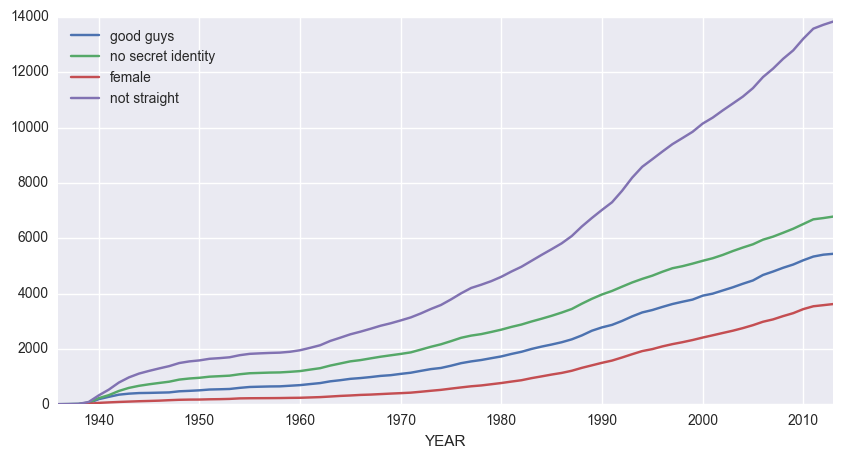

In [133]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure()
dfT_ts.plot(figsize=(10,5))
plt.legend(loc='best');


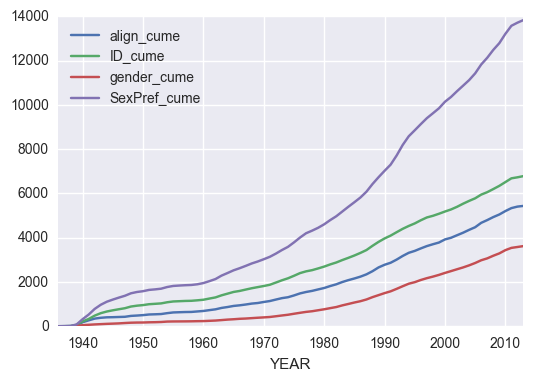

In [125]:
dfT_ts.plot()